<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/HW_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
names = df[["country"]]
X = df.drop(["country"], axis = 1) # features

In [11]:
# Scale the data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [12]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca # First column is PC 1, second column is PC 2

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [13]:
X_pca.shape # PCA with 2 PCs outputs 167 observations and 2 columns

(167, 2)

In [14]:
X.shape # Original data contained 167 observations and 9 columsn (9 features)

(167, 9)

# 2.) Plot a Scatter plot of the PCs on the axis

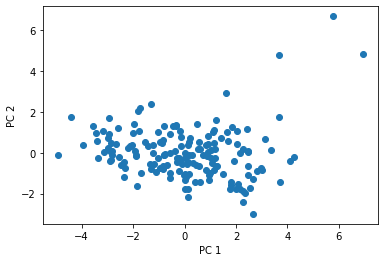

In [16]:
plt.scatter(x = X_pca[:,0], y = X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [34]:
# Loading values tell you how much of the original features are in the principal components
loadings = pca.components_
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [38]:
loadings[:,0] # Loading values for first feature in each of the PCs (PC 1 and PC 2)

array([-0.41951945,  0.19288394])

In [46]:
loadings[:,8] # Loading values for the ninth feature in each of the PCs (PC 1 and PC 2)

array([ 0.39264482, -0.0460224 ])

In [45]:
loadings[1:,] # loading values for each of the 9 features in PC 1

array([[ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [47]:
loadings.shape

(2, 9)

This gives the loading values of the 9 features for each of the 2 PCs

Example: -0.41951945 tells you the contribution of the first feature ('child_mort') to PC 1

In [48]:
# All columns are features except the first column (country names)
feature_names = df.columns[1:]

In [49]:
feature_names

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [54]:
pd.DataFrame(loadings)

,0,1,2,3,4,5,6,7,8
0,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
1,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022


In [57]:
np.sum(loadings**2, axis = 0)

array([0.21320078, 0.45656697, 0.08184323, 0.47741956, 0.15926317,
       0.03738641, 0.23093748, 0.18709439, 0.15628802])

In [59]:
# To calculate feature importance (in explaining the variability of the data) we need to sum the squares of the loading values for each feature across all PCs
feature_importance = pd.DataFrame(np.sum(loadings**2, axis = 0)) # axis = 0 computes the sum over the rows, giving a total for each column
feature_importance

,0
0,0.213201
1,0.456567
2,0.081843
3,0.477420
4,0.159263
5,0.037386
6,0.230937
7,0.187094
8,0.156288


In [60]:
# Column 0 is the feature importance
feature_importance.index = feature_names # Rename the index to be the feature names
feature_importance

,0
child_mort,0.213201
exports,0.456567
health,0.081843
imports,0.477420
income,0.159263
inflation,0.037386
life_expec,0.230937
total_fer,0.187094
gdpp,0.156288


Note: Feature importance of 'child_mort' tells us: How important is child mortality in predicting the spread of the data?

In [62]:
# Sort the features in order of importance
feature_importance = feature_importance.sort_values(0, ascending = False)
feature_importance = feature_importance.rename(columns = {0: 'feature_importance'})
feature_importance

,feature_importance
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

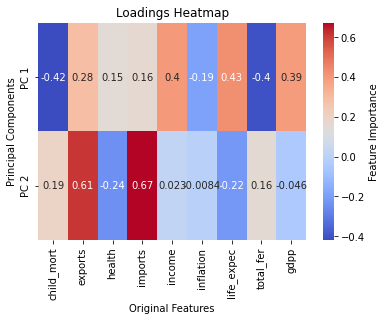

In [63]:
sns.heatmap(loadings, annot = True, cmap = 'coolwarm', xticklabels = feature_names, yticklabels = ['PC 1', 'PC 2'], cbar_kws = {'label': 'Feature Importance'})
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

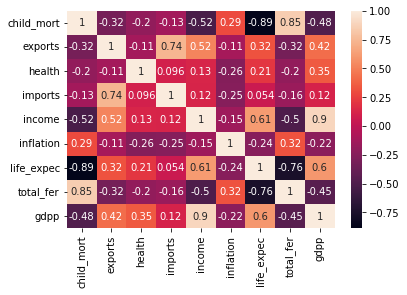

In [66]:
sns.heatmap(X.corr(), annot = True)
plt.plot()

It appears that the principal components identified features with high correlations and assigned those features similar values inside of the principal components.

For example, child mortality and total fertility have similarly large negative values in PC 1. In accordance, the correlation plot reveals a very high correlation of 0.85 between child mortality and total fertility.

Likewise, imports and exports have similarly high values for feature importance in PC 2. Correspondingly, when we check the correlation plot, we see that imports and exports are very highly correlated.


# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [67]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

In [68]:
pca.explained_variance_ratio_ # This gives us the explained variance for PC 1, the additional explained variance for PC 2, PC 3, etc

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

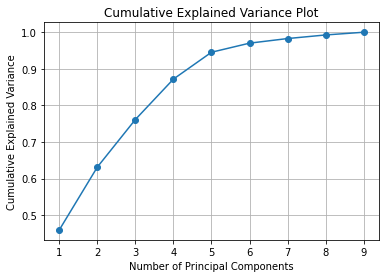

In [69]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), # x-axis (number of PCs from 1 to 9)
         cumulative_explained_variance, # Cumulative explained variance corresponding to the number of PCs
         marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [97]:
cumulative_explained_variance

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [96]:
df_cumulative_explained_variance = pd.DataFrame(cumulative_explained_variance) # Convert to dataframe
df_cumulative_explained_variance = df_cumulative_explained_variance.rename(columns = {0: 'Cumulative Explained Variance'}) # Rename column 0
df_cumulative_explained_variance['Number of PCs'] = np.arange(1, len(cumulative_explained_variance) + 1) # Add column for # of PCs
df_cumulative_explained_variance = df_cumulative_explained_variance.style.set_table_styles([dict(selector="th",props=[('max-width', '90px')])])
df_cumulative_explained_variance

,Cumulative Explained Variance,Number of PCs
0,0.459517,1
1,0.631334,2
2,0.761376,3
3,0.871908,4
4,0.945310,5
5,0.970152,6
6,0.982757,7
7,0.992569,8
8,1.000000,9


We need 6 PCs if we want to retain 95% of the variance.

Thus, we eliminate 3 features without losing more than 5% of the variance in our data; in other words, we retain 95% of the variance even when we drop 3 variables.